In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from datetime import datetime

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 6

In [13]:
train_df=pd.read_csv('C://Users//Shashank//Downloads//Open_cv_Assingment//Train_time_series.csv')

In [14]:
train_df.head(5)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [15]:
train_df.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [16]:
test_df=pd.read_csv('C://Users//Shashank//Downloads//Open_cv_Assingment//Test_time_series.csv')

# Making copy

In [17]:
train_original = train_df.copy()
test_original = test_df.copy()

In [18]:
train_df.columns, test_df.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [20]:
train_df.dtypes,test_df.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [22]:
train_df.shape, test_df.shape

((18288, 3), (5112, 2))

# Extract Features from Time

In [23]:
train_df['Datetime'] = pd.to_datetime(train_df.Datetime, format = '%d-%m-%Y %H:%M')
test_df['Datetime'] = pd.to_datetime(test_df.Datetime, format = '%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format = '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format = '%d-%m-%Y %H:%M')

In [25]:
for i in (train_df, test_df, train_original, test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day']= i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [26]:
train_df['Day of week'] = train_df['Datetime'].dt.dayofweek
temp = train_df['Datetime']

In [27]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
temp2 = train_df['Datetime'].apply(applyer)
train_df['weekend'] = temp2

In [31]:
train_df.head(20)

,ID,Datetime,Count,year,month,day,Hour,Day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1
2012-08-25 05:00:00,5,2012-08-25 05:00:00,2,2012,8,25,5,5,1
2012-08-25 06:00:00,6,2012-08-25 06:00:00,2,2012,8,25,6,5,1
2012-08-25 07:00:00,7,2012-08-25 07:00:00,2,2012,8,25,7,5,1
2012-08-25 08:00:00,8,2012-08-25 08:00:00,6,2012,8,25,8,5,1


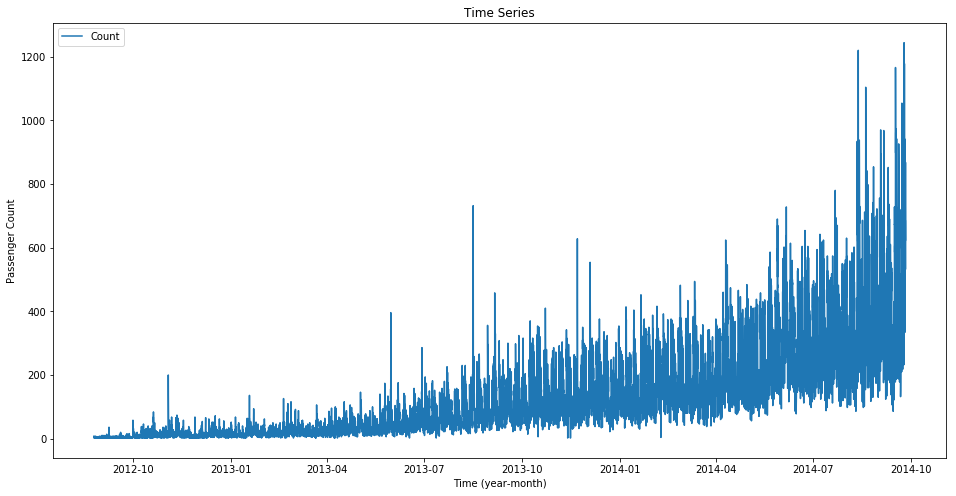

In [28]:
train_df.index = train_df['Datetime']
df = train_df.drop('ID',1)
ts = df['Count']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("Passenger Count")
plt.legend(loc = 'best')

# Exploratory Analysis

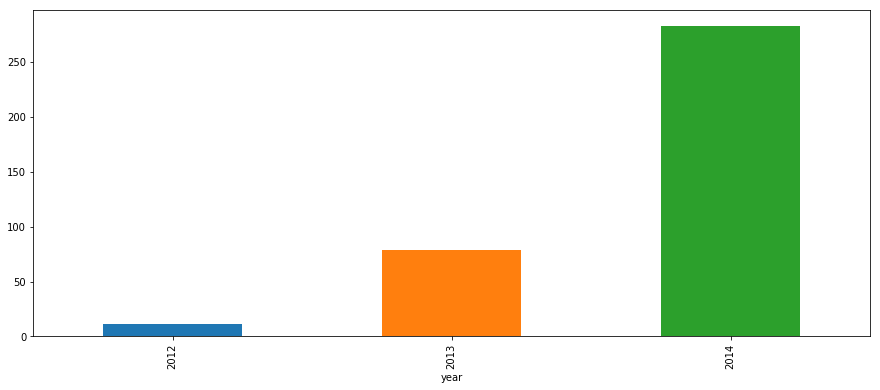

In [32]:
train_df.groupby('year')['Count'].mean().plot.bar()

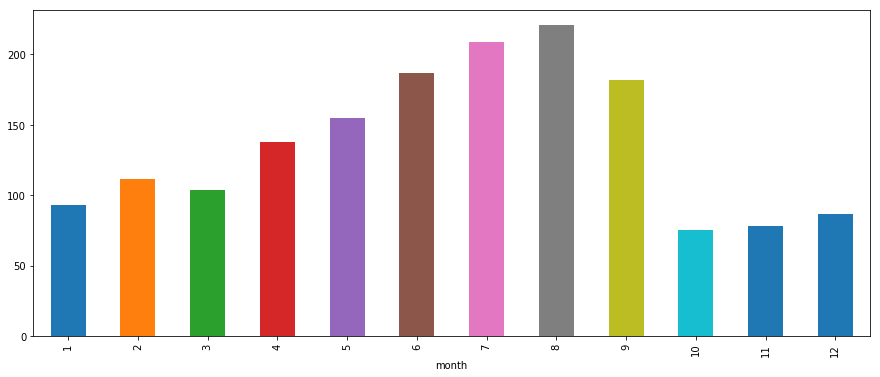

In [34]:
train_df.groupby('month')['Count'].mean().plot.bar()

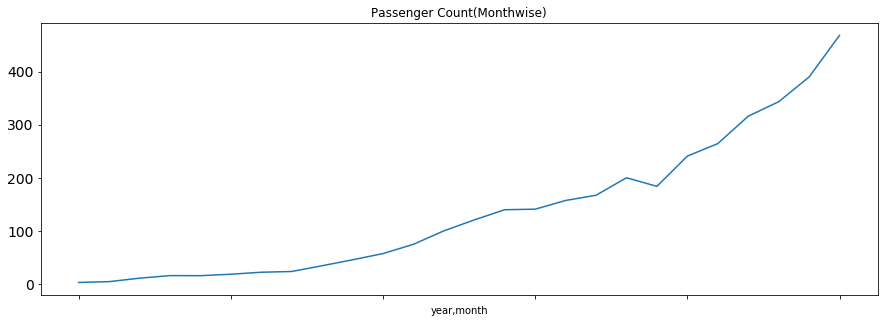

In [35]:
temp = train_df.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize =(15,5), title = "Passenger Count(Monthwise)", fontsize = 14)


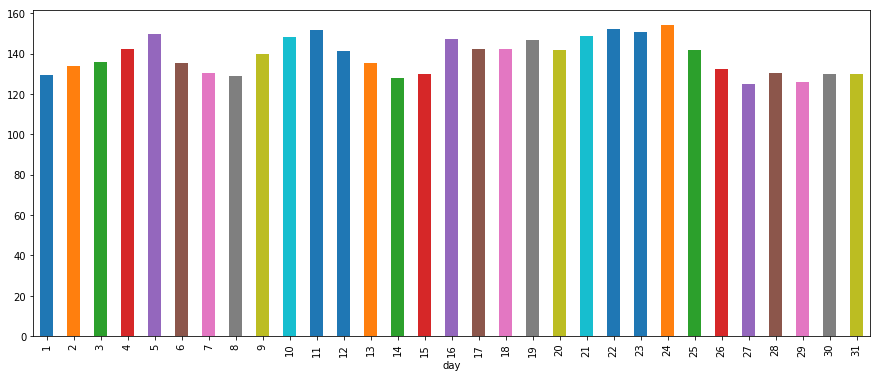

In [37]:
train_df.groupby('day') ['Count'].mean().plot.bar()

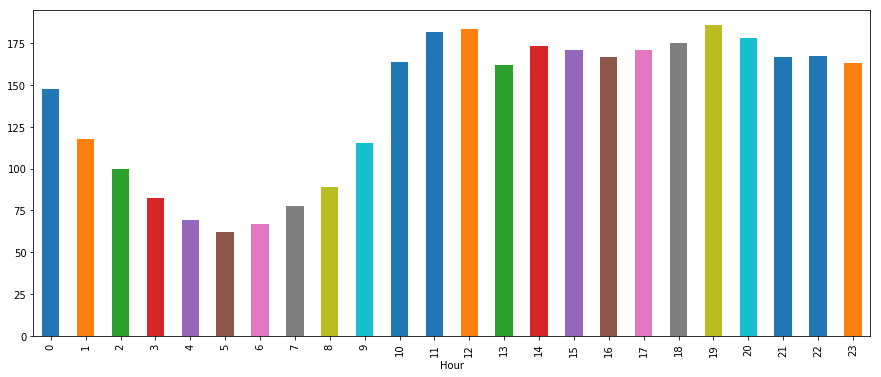

In [38]:
train_df.groupby('Hour')['Count'].mean().plot.bar()

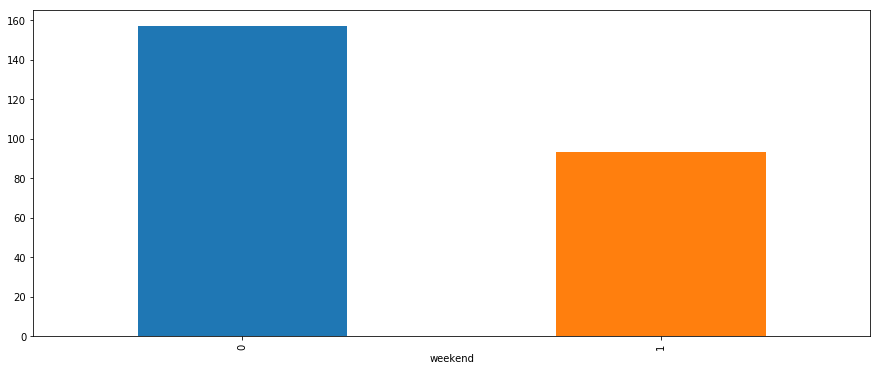

In [39]:
train_df.groupby('weekend') ['Count'].mean().plot.bar()

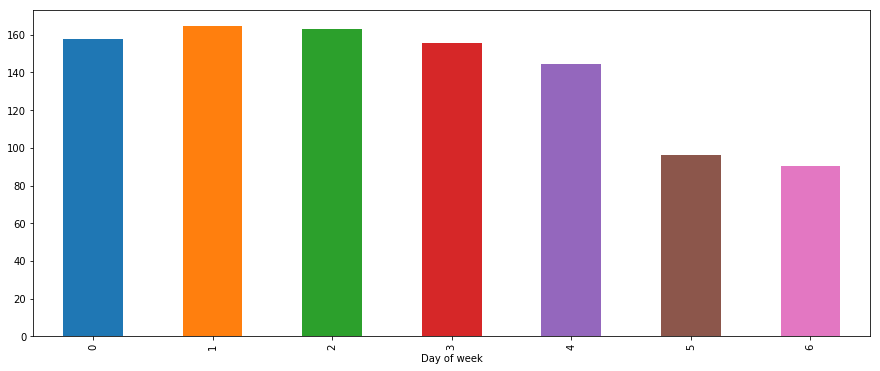

In [40]:
train_df.groupby('Day of week') ['Count'].mean().plot.bar()

In [41]:
train_df.Timestamp = pd.to_datetime(train_df.Datetime, format = '%d-%m-%y %H:%M')
train_df.index = train_df.Timestamp

#Hourly
hourly = train_df.resample('H').mean()

#Daily
daily = train_df.resample('D').mean()

#Weekly
weekly = train_df.resample('W').mean()

#Monthly
monthly = train_df.resample('M').mean()

C:\Users\Shashank\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


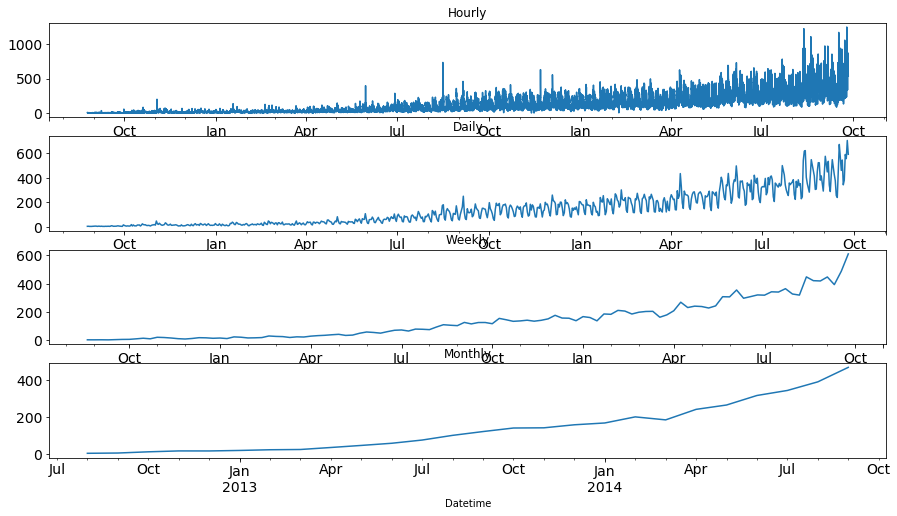

In [42]:
fig,axs = plt.subplots(4,1)

hourly.Count.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Count.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Count.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Count.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])

In [44]:
test_df.Timestamp = pd.to_datetime(test_df.Datetime, format='%d-%m-%Y %H:%M')
test_df.index = test_df.Timestamp

#Converting to Daily mean 
test_df = test_df.resample('D').mean()

train_df.Timestamp = pd.to_datetime(train_df.Datetime, format='%d-%m-%Y %H:%M')
train_df.index = train_df.Timestamp

#Converting to Daily mean
train = train_df.resample('D').mean()

C:\Users\Shashank\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


# Divide data into training and validation

In [45]:
Train = train_df.ix['2012-08-25':'2014-06-24']
valid = train_df.ix['2014-06-25':'2014-09-25']

C:\Users\Shashank\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Shashank\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


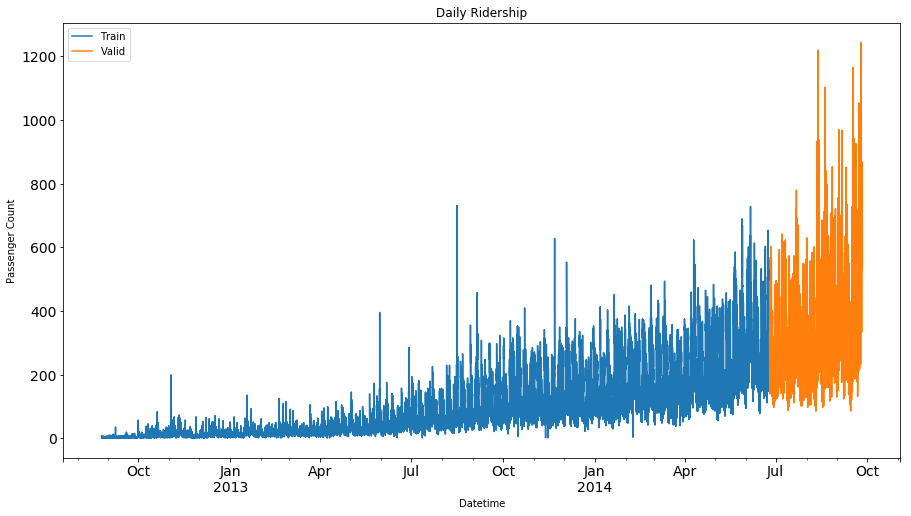

In [46]:
Train.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize = 14, label = 'Train')
valid.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize =14, label = 'Valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.legend(loc = 'best')

# Naive Approach

Text(0.5,1,'Naive Forecast')

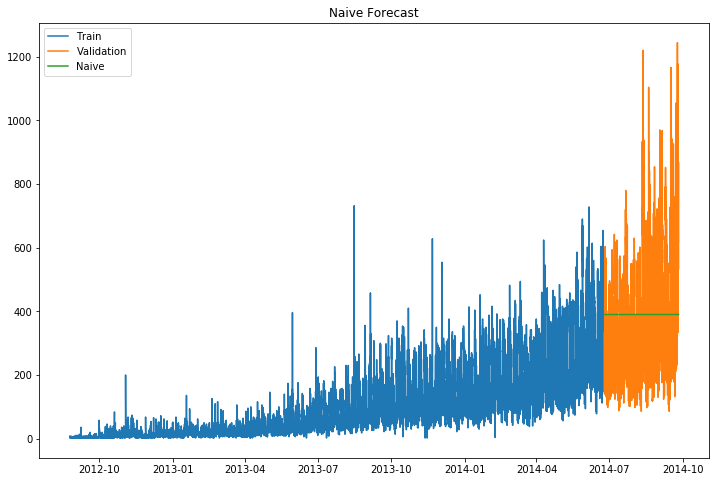

In [47]:
dd = np.asarray(Train.Count)
y_hat =valid.copy()
y_hat['naive']= dd[len(dd)- 1]
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['Count'],label = 'Train')
plt.plot(valid.index, valid['Count'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive Forecast')

# Calculate RMS Error for Naive Approach

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.Count, y_hat.naive))
rmse

186.37368520699056

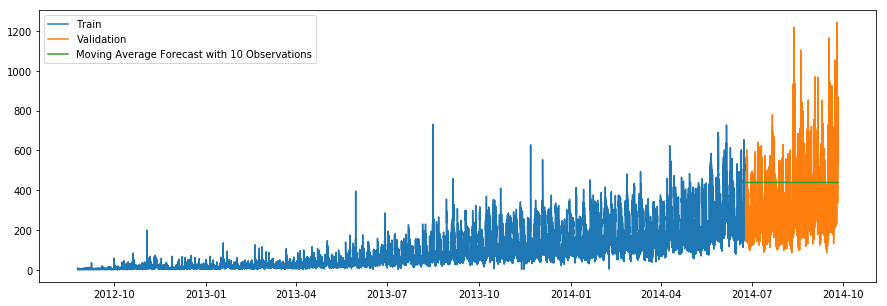

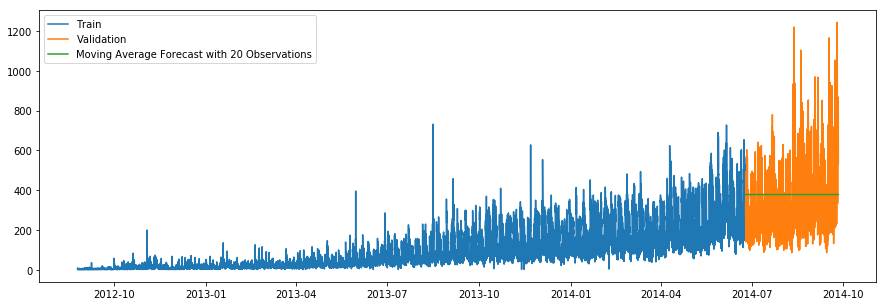

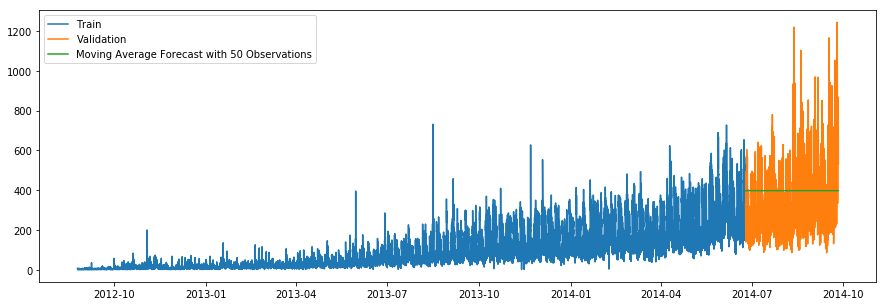

In [49]:
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = 'Moving Average Forecast with 10 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 20 Observations')
plt.legend(loc = 'best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_average_forecast']= Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()

# RMS Error for Moving Average

In [50]:
rmse = sqrt(mean_squared_error(valid['Count'], y_hat_avg['moving_average_forecast']))
rmse

186.5773761711873

# Simple Exponential Smoothing

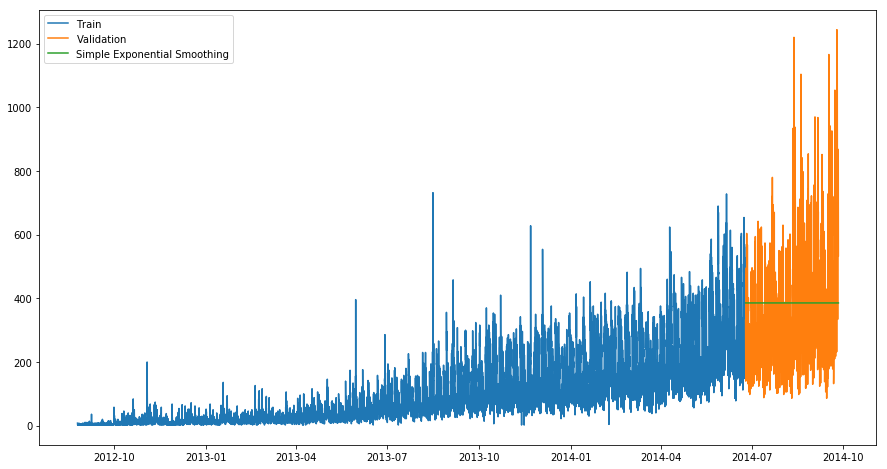

In [51]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt

y_hat = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level = 0.6,optimized = False)
y_hat['SES'] = fit2.forecast(len(valid))
plt.figure(figsize =(15,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')

# RMSE Error for Simple Exponential Smoothing

In [52]:
rmse = sqrt(mean_squared_error(valid.Count, y_hat['SES']))
rmse

186.40944652452376

# Holt's Linear Trend Model

<Figure size 1600x800 with 0 Axes>

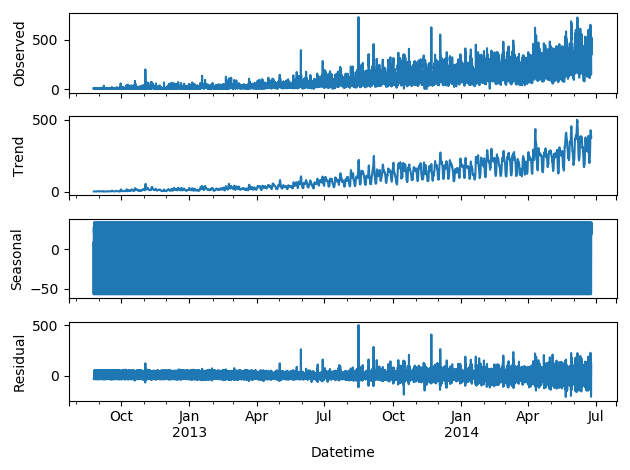

In [53]:
plt.style.use('default')
plt.figure(figsize = (16,8))
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

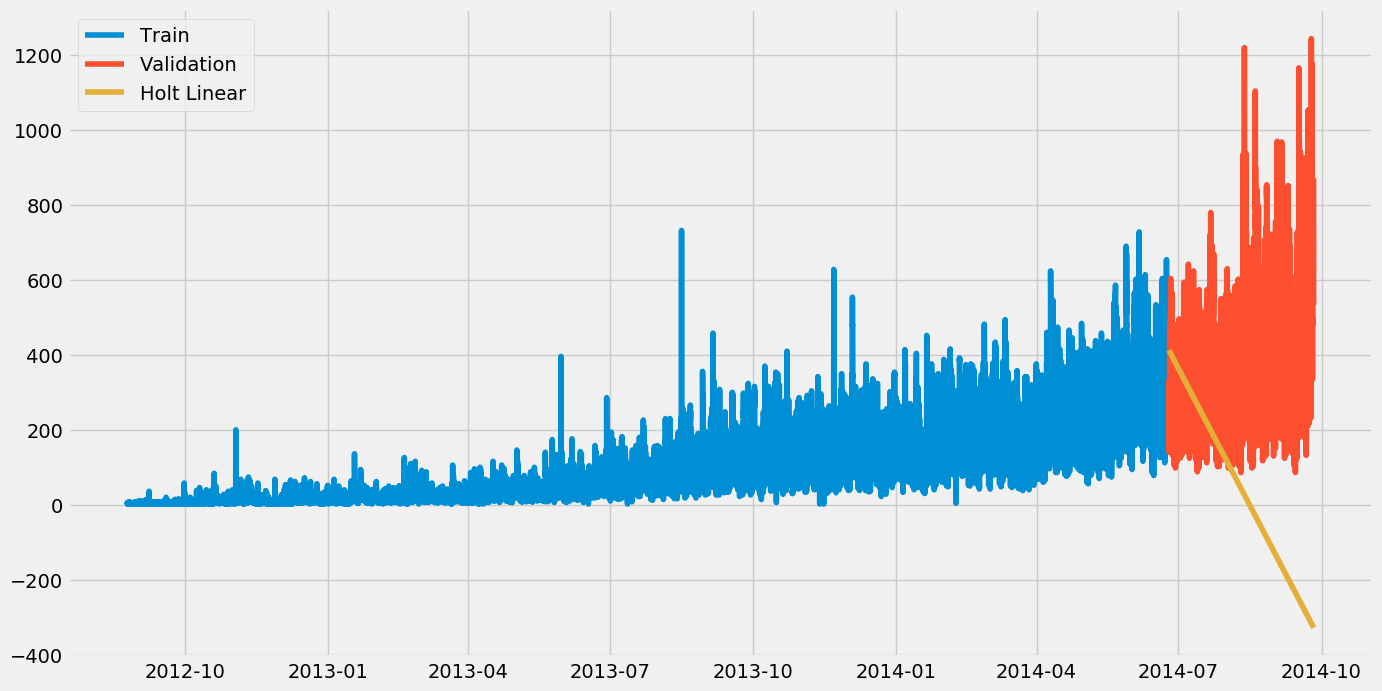

In [54]:
y_hat_holt = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_holt['Holt_linear'] = fit1.forecast(len(valid))
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,8))
plt.plot(Train.Count, label = 'Train')
plt.plot(valid.Count, label = 'Validation')
plt.plot(y_hat_holt['Holt_linear'], label = 'Holt Linear')
plt.legend(loc = 'best')

In [55]:
rmse = sqrt(mean_squared_error(valid.Count, y_hat_holt.Holt_linear))
rmse

475.09398202897876

# Make Predictions on test set

In [58]:
predict = fit1.forecast(len(test_df))
test_df['prediction'] = predict

In [60]:
#Calculating hourly ration of count
train_original['ratio'] = train_original['Count']/train_original['Count'].sum()

#Grouping hourly ratio
temp = train_original.groupby(['Hour']) ['ratio'].sum()

#Group by to csv format
pd.DataFrame(temp, columns= ['Hour', 'ratio']).to_csv('Groupby.csv')
temp2 = pd.read_csv("Groupby.csv")
temp2 =temp2.drop('Hour.1',1)
#Merge test and test_original on day, month and year
merge = pd.merge(test_df, test_original, on = ('day', 'month','year'), how = 'left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year','month','day','Hour_x','Datetime','Hour_y'], axis =1)

#Predicting by merging temp2 and merge
prediction = pd.merge(merge, temp2, on = 'Hour',how = 'left')

#Converting the ration to original scale
prediction['Count'] = prediction['prediction'] * prediction['ratio'] * 24
prediction['ID'] = prediction['ID_y']
prediction.head()

,ID_x,prediction,ID_y,Hour,ratio,Count,ID
0,18299.5,412.310167,18288,0,0.044287,438.235450,18288
1,18299.5,412.310167,18289,1,0.035343,349.734817,18289
2,18299.5,412.310167,18290,2,0.029911,295.983376,18290
3,18299.5,412.310167,18291,3,0.024714,244.560489,18291
4,18299.5,412.310167,18292,4,0.020802,205.847303,18292


In [61]:
submission = prediction.drop(['ID_x','ID_y','prediction','Hour','ratio'], axis =1)
pd.DataFrame(submission, columns = ['ID','Count']).to_csv('Holt_Linear.csv')

# Holt Winter's Model'

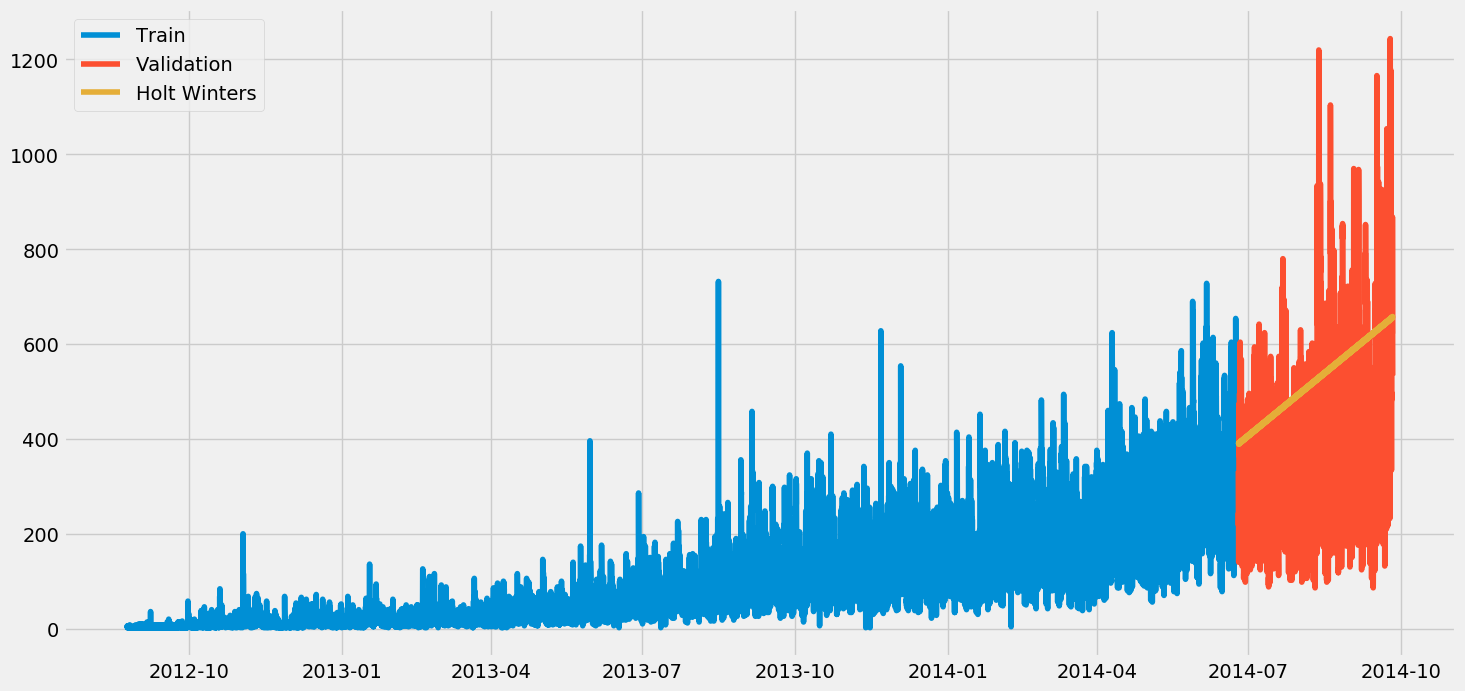

In [62]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods= 7, trend = 'add', seasonal= 'add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize = (16,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Validation')
plt.plot(y_hat_avg.Holt_Winter, label = 'Holt Winters')
plt.legend(loc = 'best')

In [63]:
rmse = sqrt(mean_squared_error(valid['Count'], y_hat_avg['Holt_Winter']))
rmse

222.71226066389136

# Apply Holt Winter's on test data

In [64]:
predict = fit1.forecast(len(test_df))
test_df['prediction'] = predict

In [65]:
#Merge test and test_original on day,month and year
merge = pd.merge(test_df, test_original, on = ('day', 'month', 'year'), how = 'left')
merge['Hour']= merge['Hour_y']
merge.head()
merge = merge.drop(['year', 'month', 'Datetime','Hour_x', 'Hour_y'], axis =1)

#Predicting by merge and temp2
prediction = pd.merge(merge, temp2 , on = 'Hour', how = 'left')

#Converting the ration to original scale
prediction['Count'] = prediction['prediction'] * prediction['ratio'] *24
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio,Count
0,18299.5,26.0,388.890927,18288,0,0.044287,413.343653
1,18299.5,26.0,388.890927,18289,1,0.035343,329.869860
2,18299.5,26.0,388.890927,18290,2,0.029911,279.171504
3,18299.5,26.0,388.890927,18291,3,0.024714,230.669440
4,18299.5,26.0,388.890927,18292,4,0.020802,194.155165


In [66]:
prediction['ID']= prediction['ID_y']
submission = prediction.drop(['ID_x','ID_y','day','Hour','prediction','ratio'], axis =1)

pd.DataFrame(submission, columns = ['ID','Count']).to_csv('Holt winters.csv')

# ARIMA Model

In [70]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #Determine rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=24).mean()
    rolstd = pd.Series(timeseries).rolling(window=24).std()
    
    #Plot rolling Statistics
    orig = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)
    
    #Perform Dickey Fuller test
    print("Results of Dickey Fuller test: ")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '# Lag Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

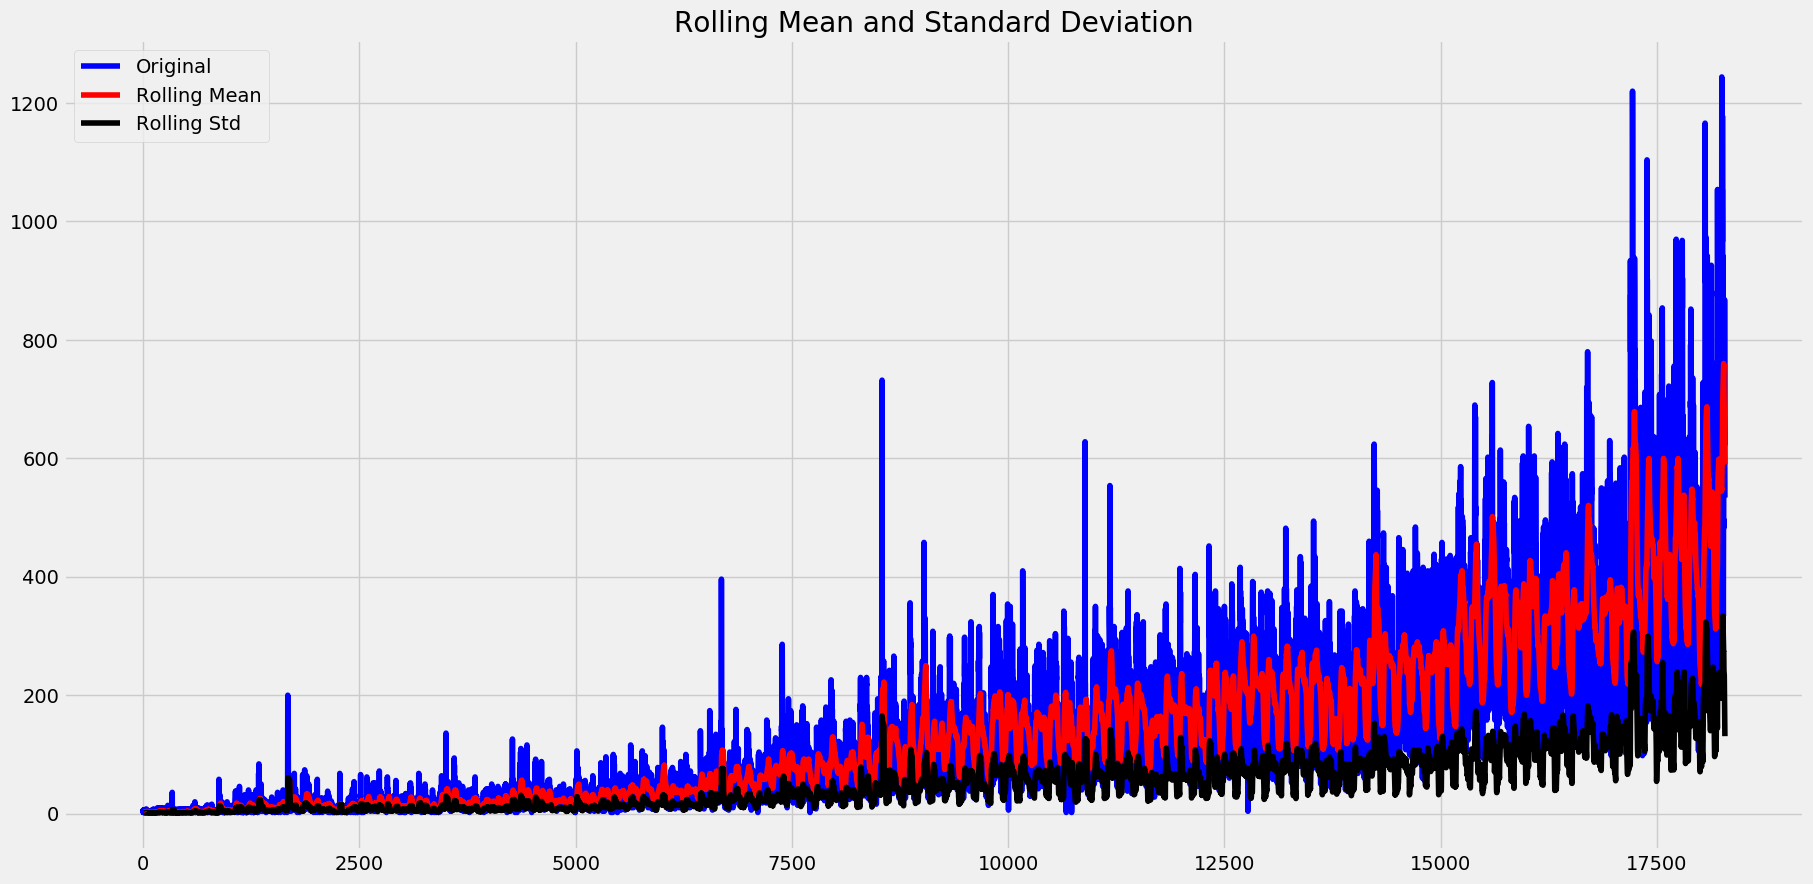

Results of Dickey Fuller test: 
Test Statistics                   -4.456561
p-value                            0.000235
# Lag Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [71]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(20,10)
test_stationary(train_original['Count'])

# Remove Trend

In [72]:
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

In [ ]:
ts_log.rolling(12).mean()

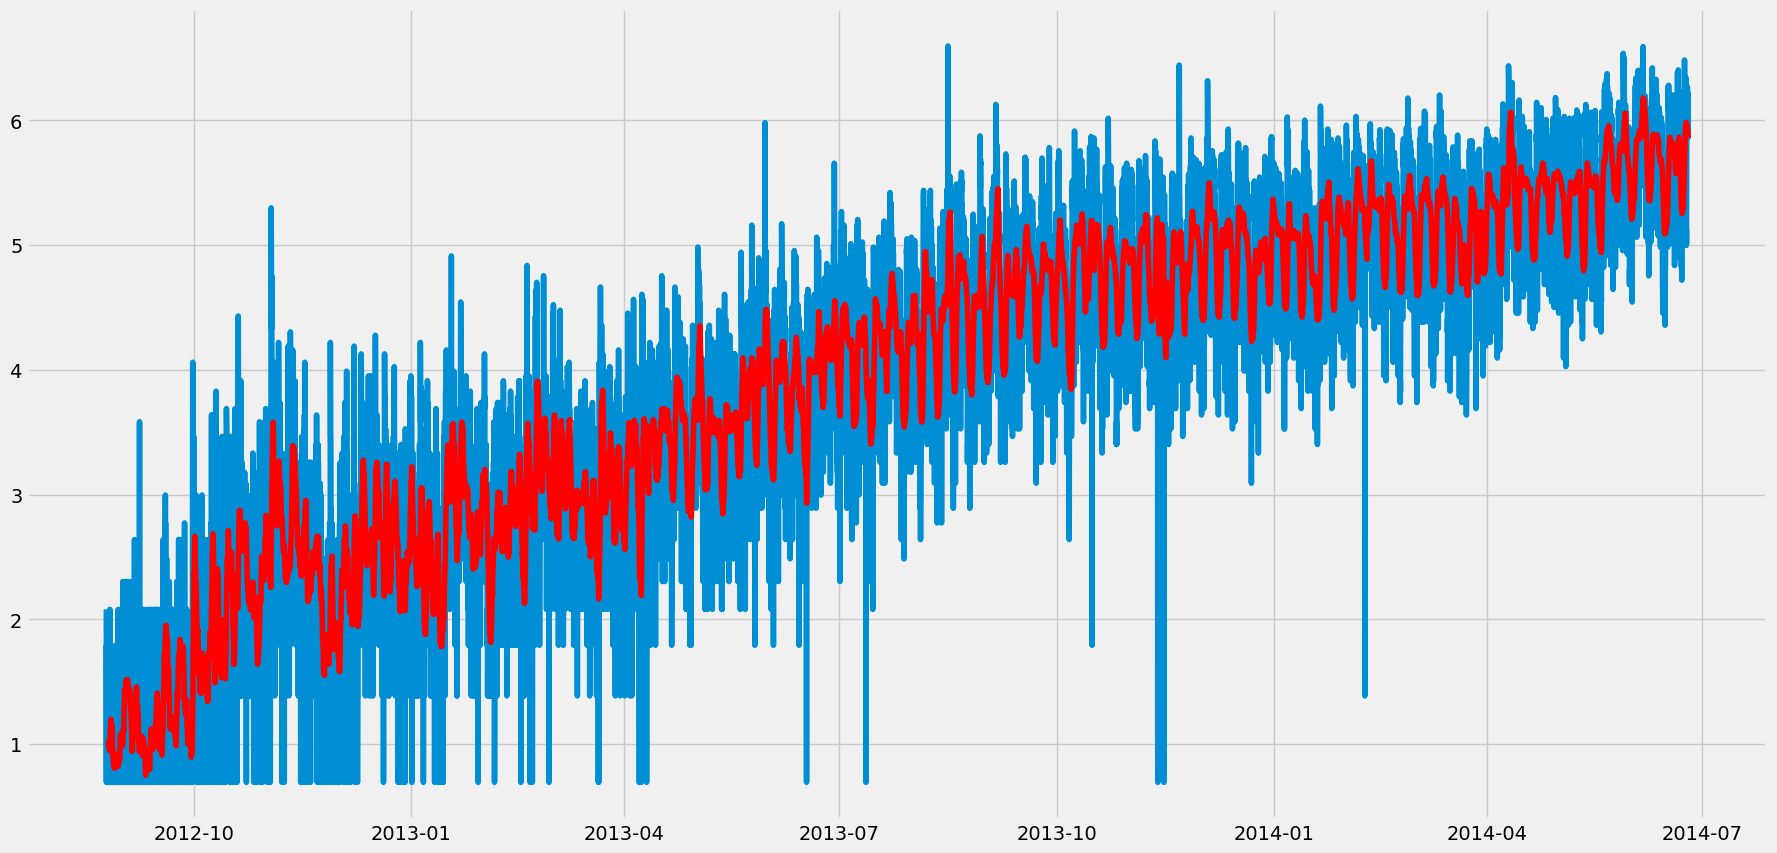

In [75]:
moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')

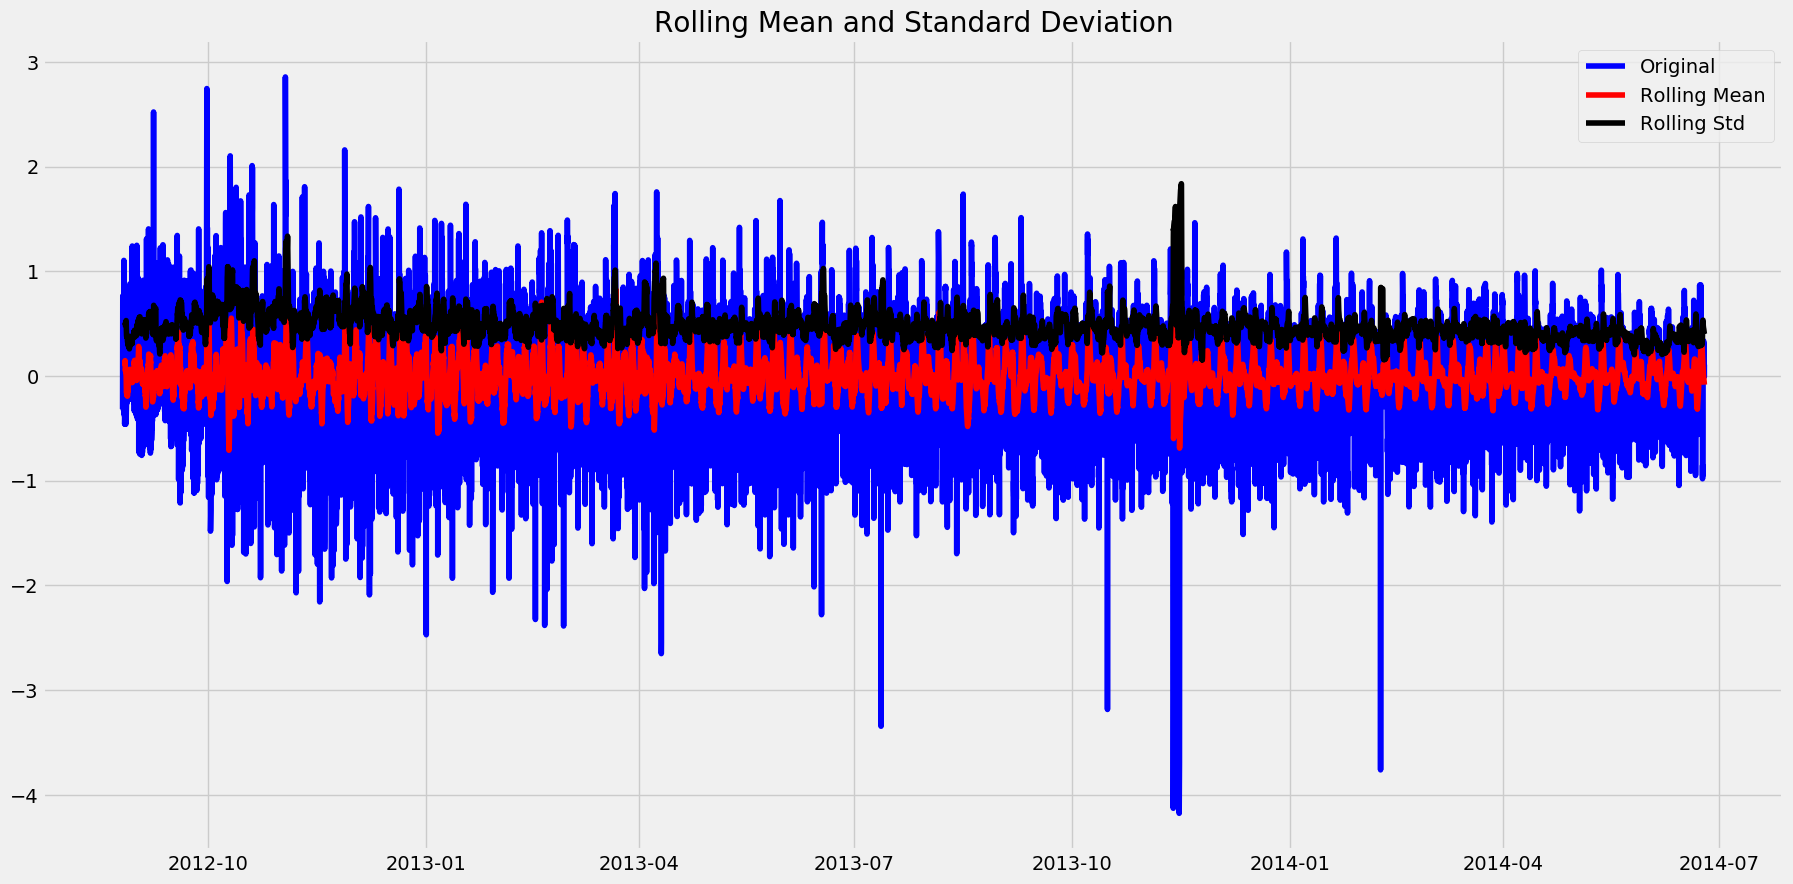

Results of Dickey Fuller test: 
Test Statistics                  -22.470949
p-value                            0.000000
# Lag Used                        43.000000
Number of Observations Used    15989.000000
Critical Value (1%)               -3.430759
Critical Value (5%)               -2.861721
Critical Value (10%)              -2.566866
dtype: float64


In [76]:
train_log_moving_diff = Train_log - moving_avg
train_log_moving_diff.dropna(inplace = True)
test_stationary(train_log_moving_diff)

# Differncing can help to make series stable and eliminate trend

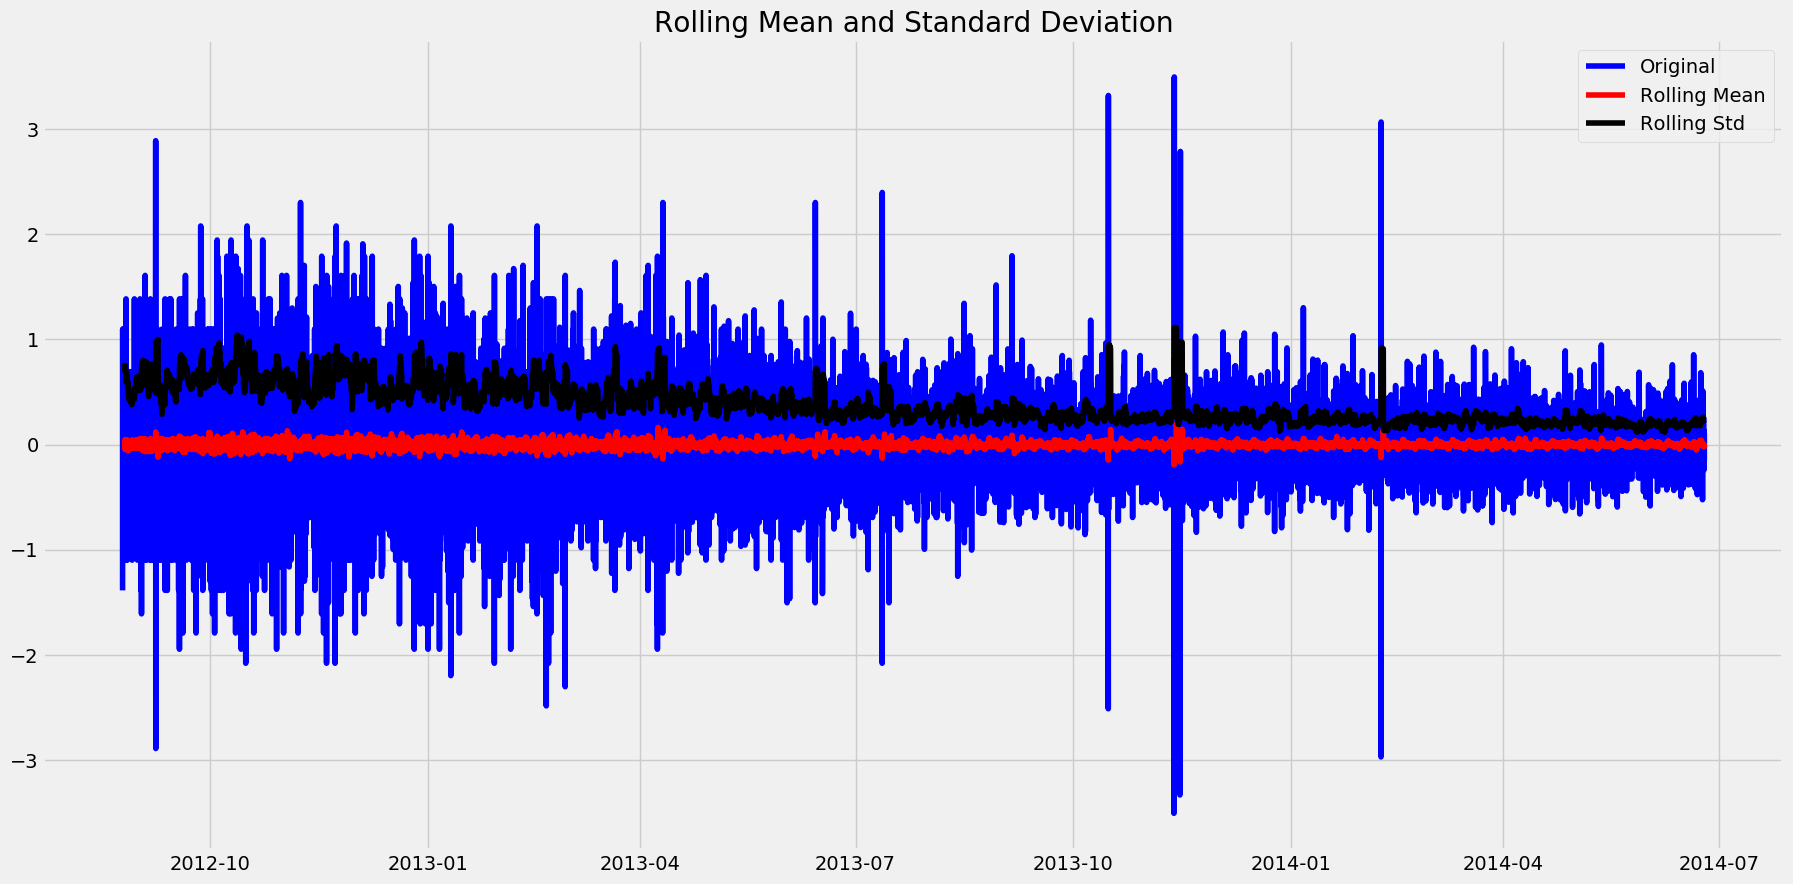

Results of Dickey Fuller test: 
Test Statistics                  -28.579381
p-value                            0.000000
# Lag Used                        43.000000
Number of Observations Used    16011.000000
Critical Value (1%)               -3.430758
Critical Value (5%)               -2.861721
Critical Value (10%)              -2.566866
dtype: float64


In [77]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationary(train_log_diff.dropna())

# Removing Seasonailty

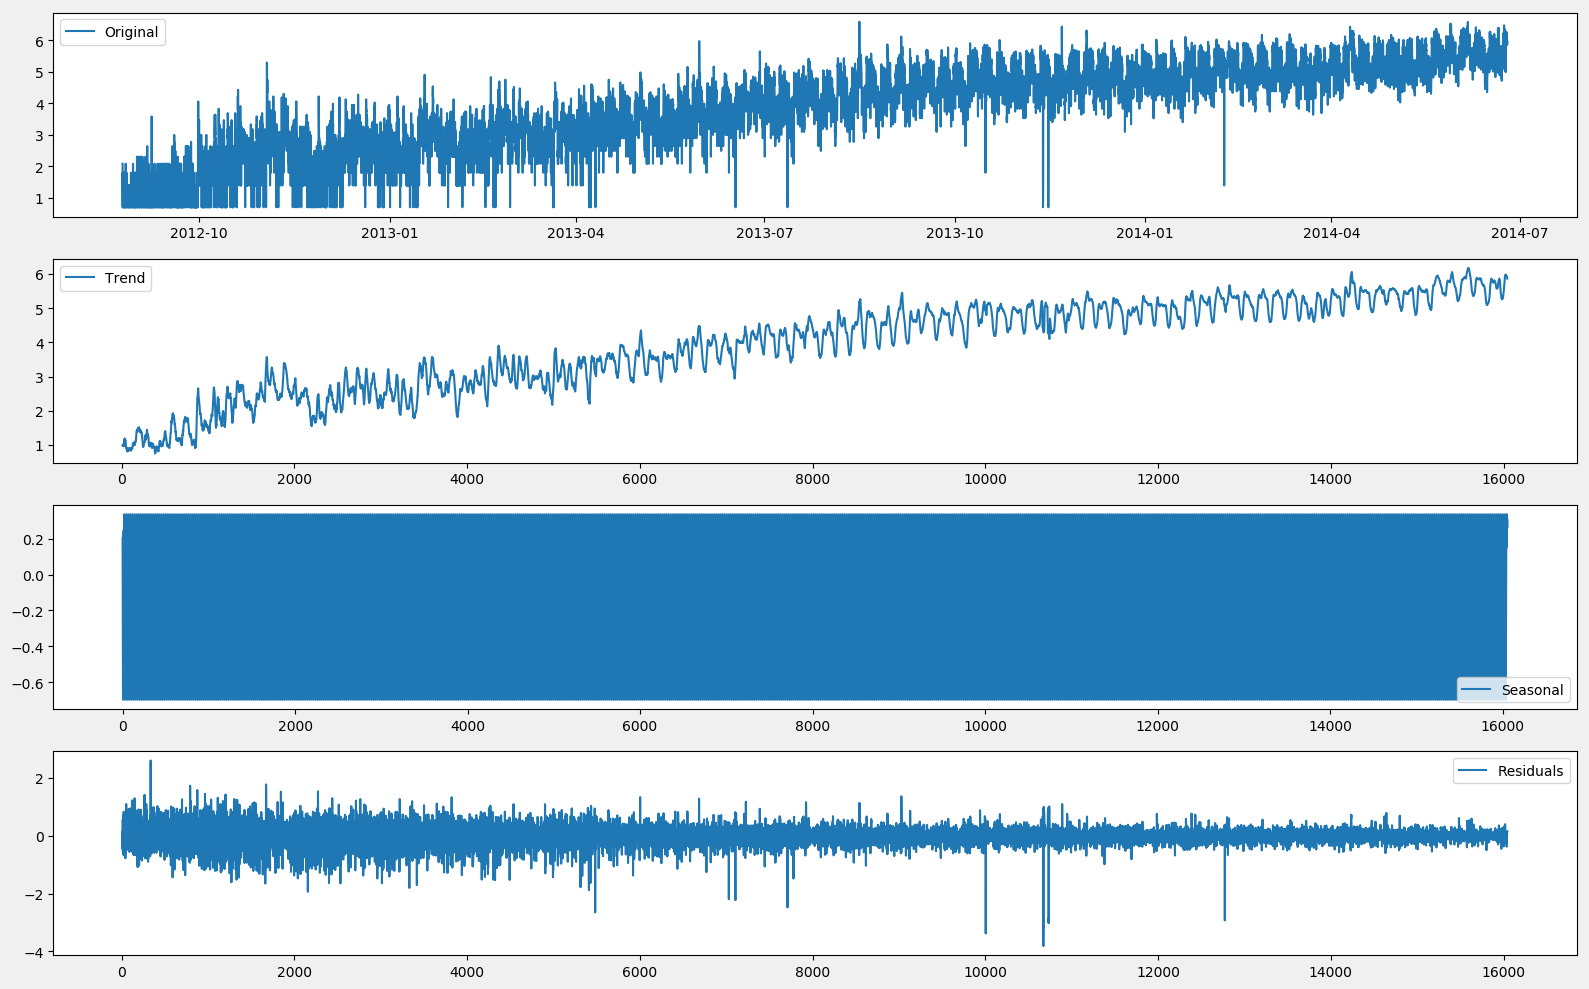

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (16,10))
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24)
plt.style.use('default')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

Let's check stationarity of residuals

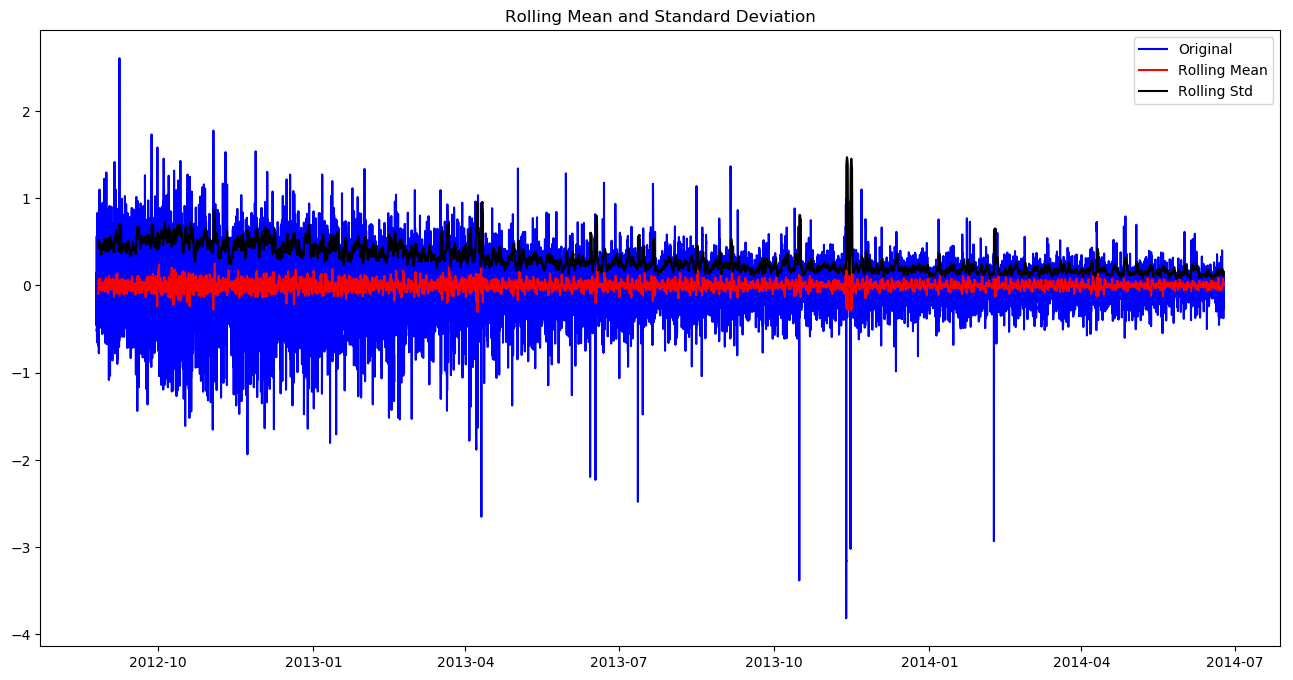

Results of Dickey Fuller test: 
Test Statistics                  -31.326116
p-value                            0.000000
# Lag Used                        43.000000
Number of Observations Used    15988.000000
Critical Value (1%)               -3.430759
Critical Value (5%)               -2.861721
Critical Value (10%)              -2.566866
dtype: float64


In [79]:
plt.figure(figsize = (16,8))
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace = True)
test_stationary(train_log_decompose[0])

In [80]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff.dropna(), nlags = 25)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 25, method= "ols")

# AR Model

C:\Users\Shashank\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Shashank\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Shashank\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Shashank\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future 

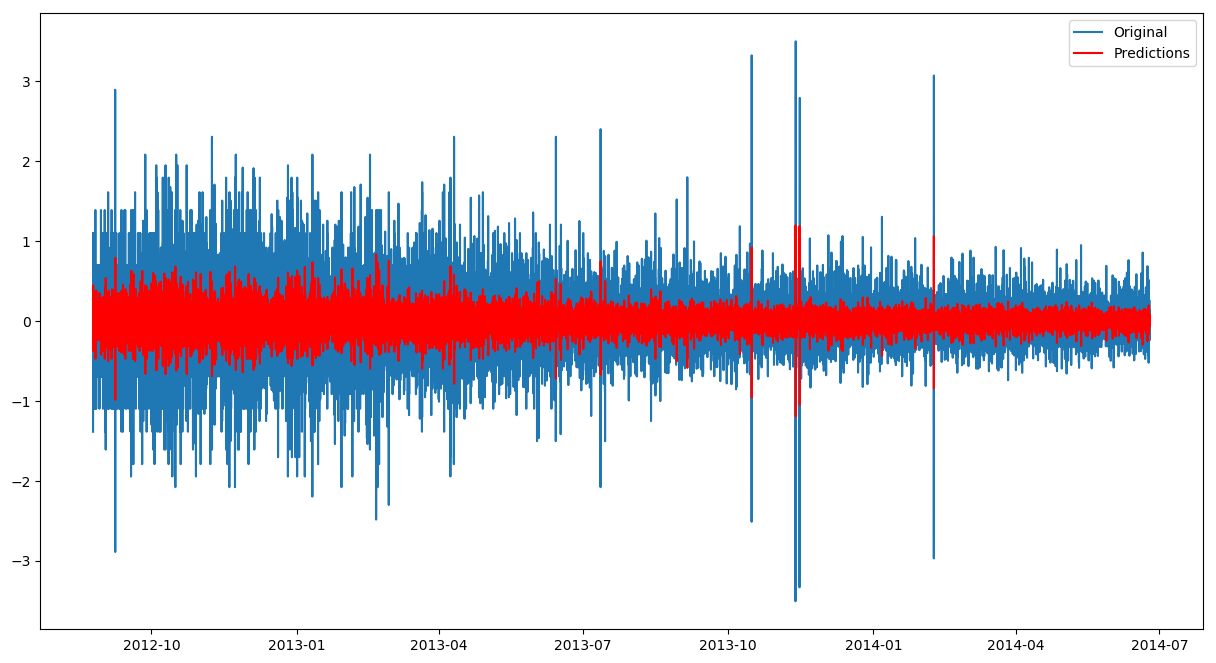

In [81]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize = (15,8))
model = ARIMA(Train_log, order = (2,1,0))  #here q value is zero since it is just AR Model
results_AR = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_AR.fittedvalues, color = 'red', label = 'Predictions')
plt.legend(loc = 'best')

In [82]:
AR_predict = results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(valid.shape[0])* np.log(valid['Count'])[0], index = valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

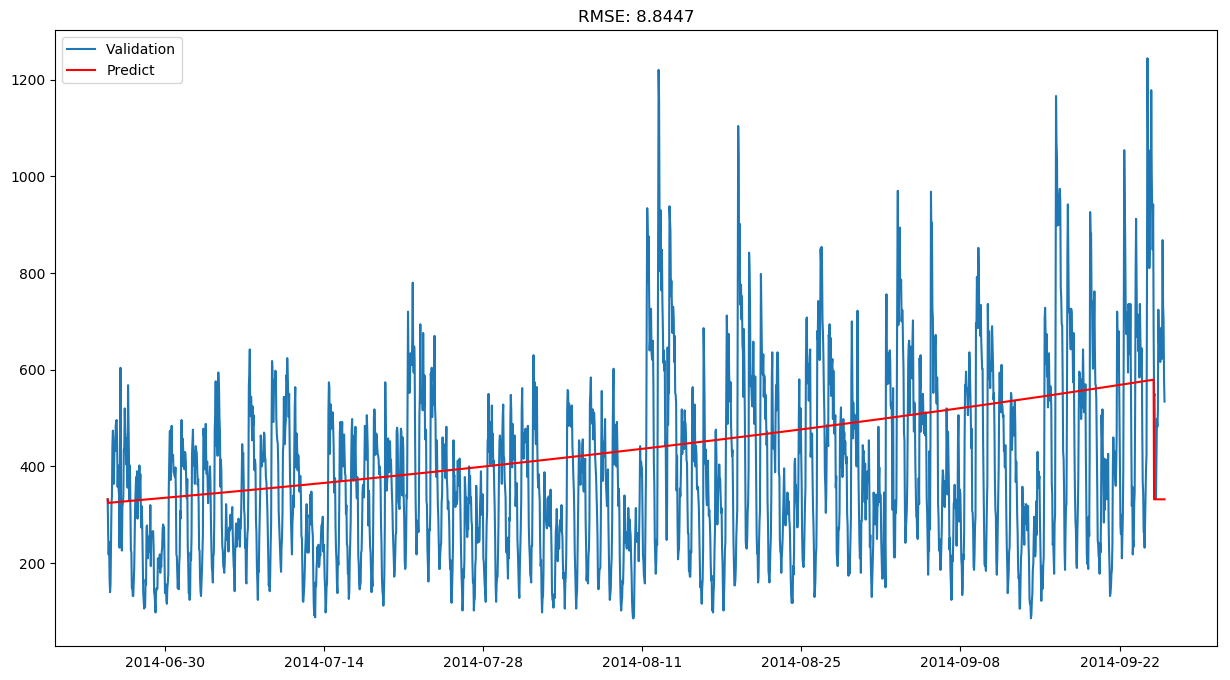

In [83]:
plt.figure(figsize = (15,8))
plt.plot(valid['Count'], label = "Validation")
plt.plot(AR_predict, color = "red", label = "Predict")
plt.legend(loc = "best")
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0]))
plt.show()

# Moving Average Model

C:\Users\Shashank\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Shashank\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


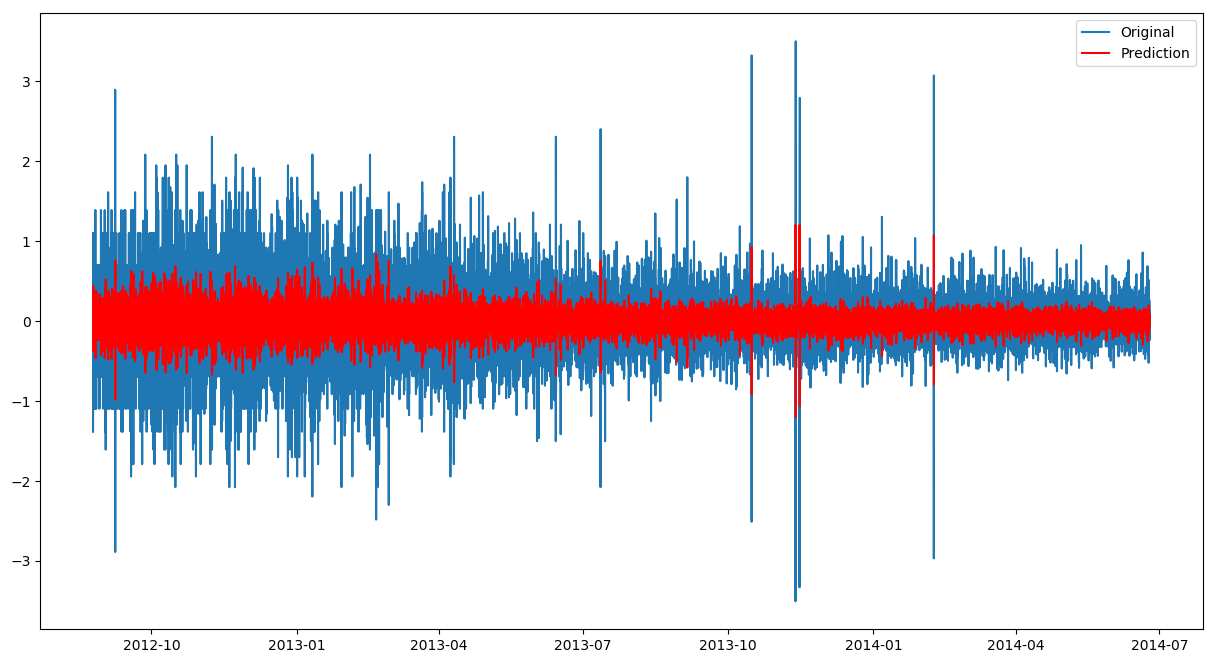

In [84]:
plt.figure(figsize = (15,8))
model = ARIMA(Train_log, order = (0,1,2)) # here the p value is 0 since it is moving average model
results_MA = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_MA.fittedvalues, color = "red", label = "Prediction")
plt.legend(loc = "best")

In [85]:
MA_predict = results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

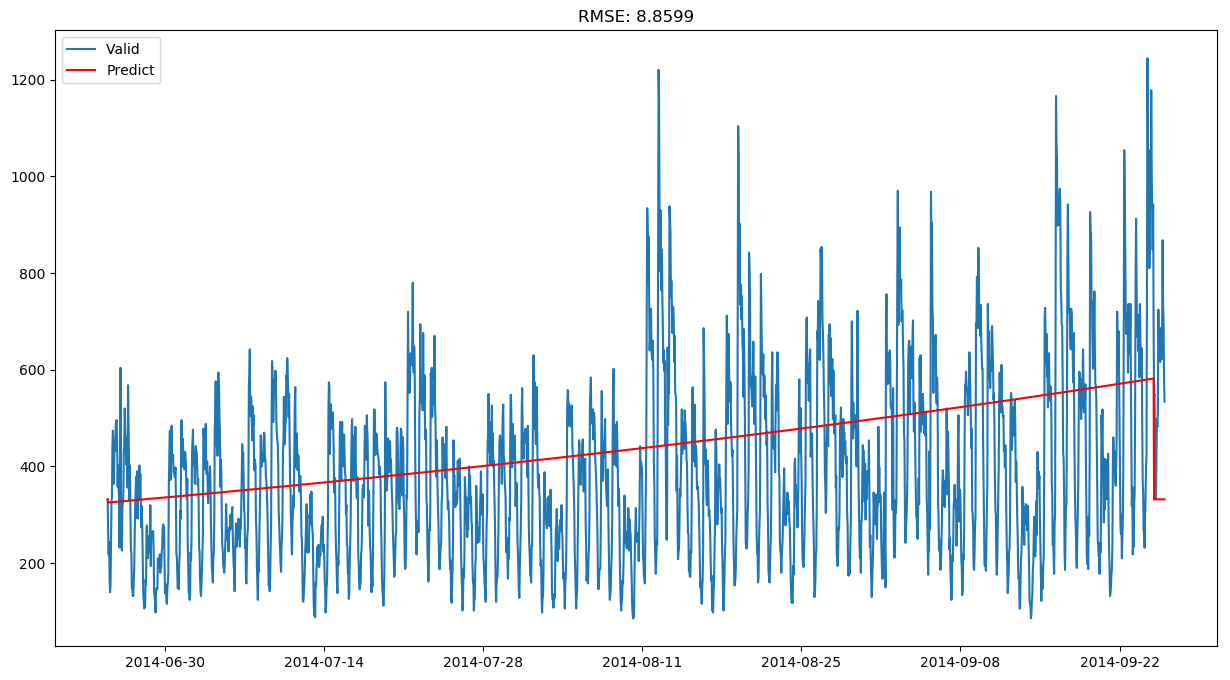

In [86]:
plt.figure(figsize = (15,8))
plt.plot(valid['Count'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()

# Combined Model

C:\Users\Shashank\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Shashank\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


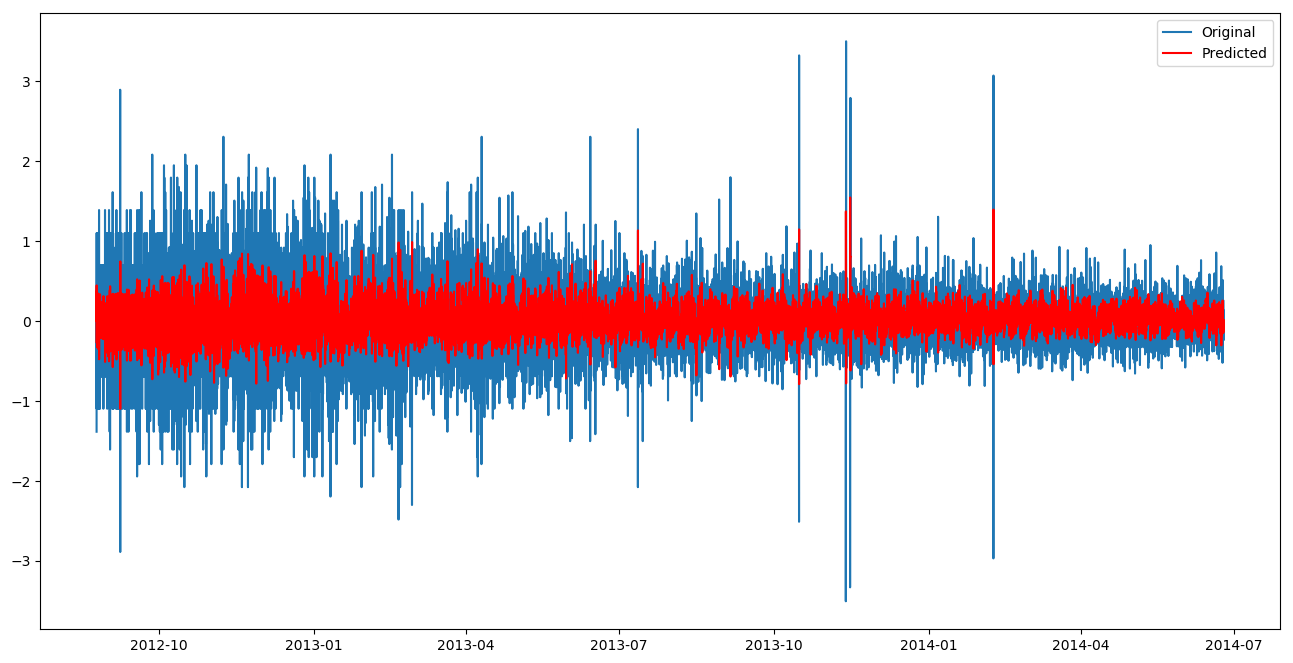

In [87]:
plt.figure(figsize = (16,8))
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

# Function to scale model to original scale

In [88]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [89]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [90]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")

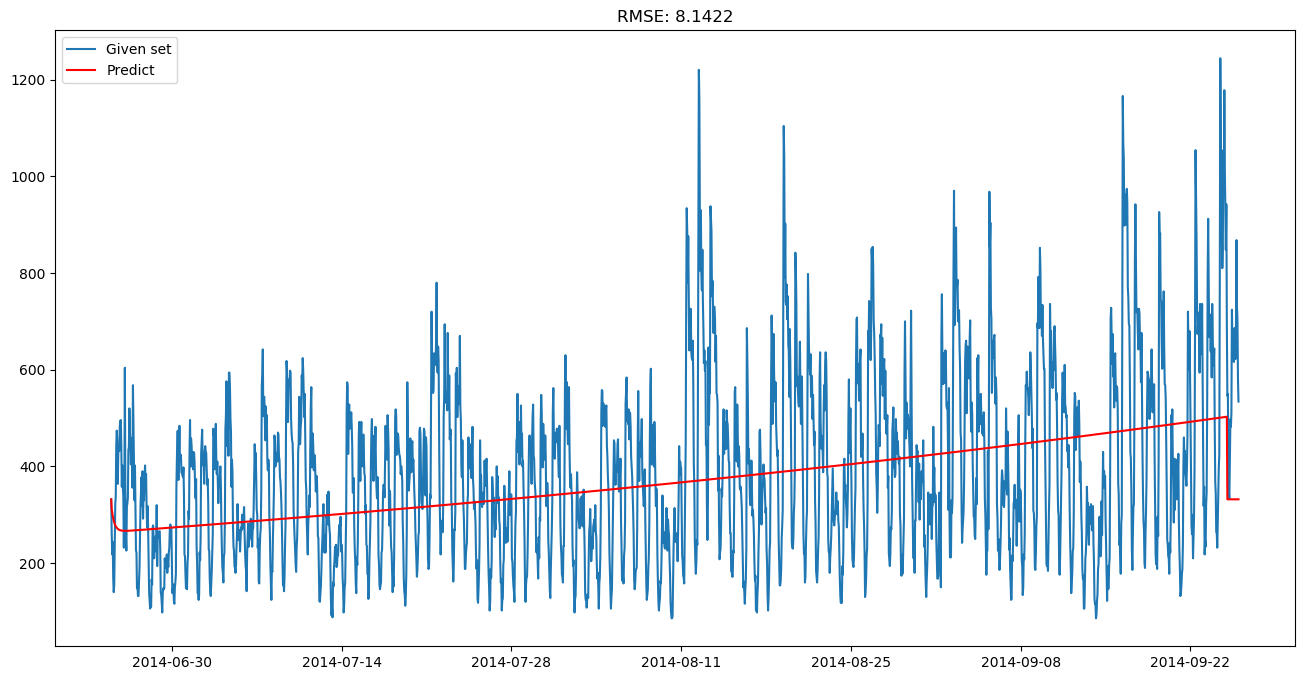

In [91]:
plt.figure(figsize = (16,8))
check_prediction_diff(ARIMA_predict_diff, valid)

# SARIMAX Model

In [92]:
import statsmodels.api as sm

C:\Users\Shashank\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


Text(0.5,1,'SARIMAX Model')

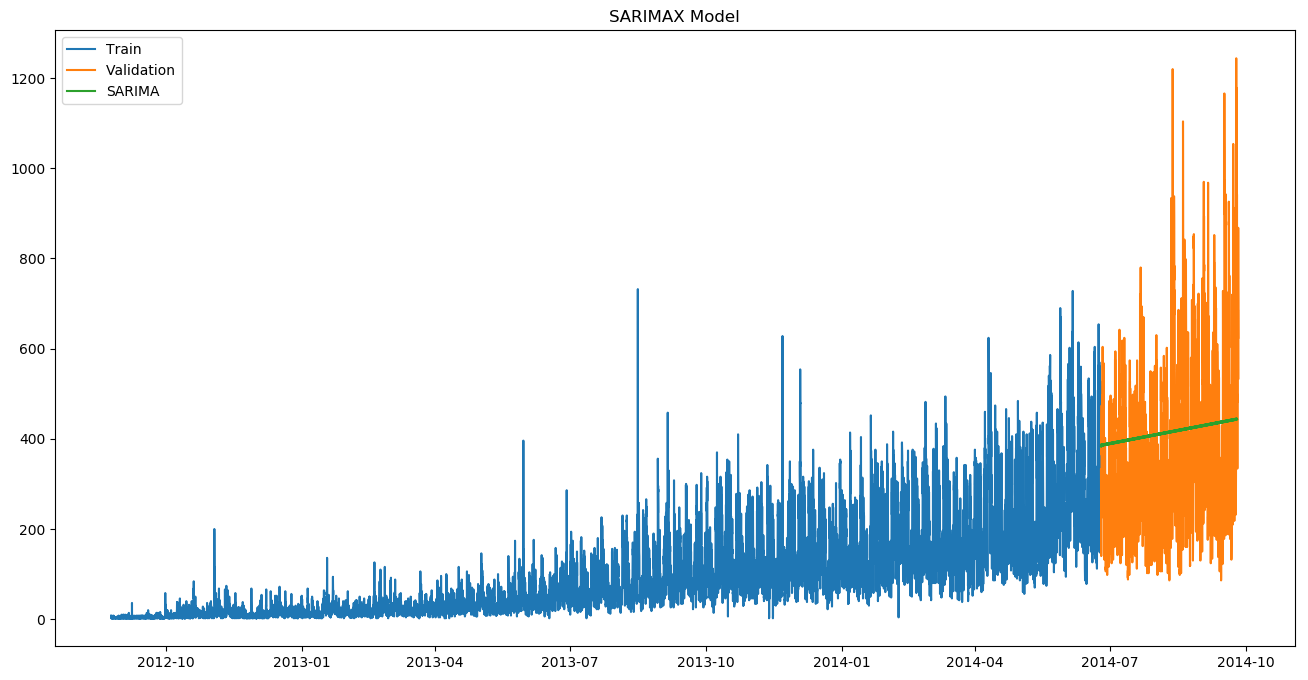

In [93]:
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order = (2,1,4), seasonal_order =(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label = "Train")
plt.plot(valid.Count, label = "Validation")
plt.plot(y_hat_avg['SARIMA'], label ="SARIMA")
plt.legend(loc = "best")
plt.title("SARIMAX Model")

In [94]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA))
print(rms)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Covert to Hourly Predictions

In [95]:
predict = fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

C:\Users\Shashank\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1740: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [97]:
test_df['prediction']=predict

In [99]:
#Merge test and test_original on day,month and year
merge = pd.merge(test_df,test_original, on = ('day', 'month', 'year'), how = 'left')
merge['Hour'] = merge['Hour_y']

#Predicting by merging merge and temp2
prediction = pd.merge(merge, temp2, on = 'Hour', how = 'left')

#Converting the ratio to original scale
prediction['Count'] = prediction['prediction'] * prediction['ratio'] * 24

In [100]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')